In [1]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Reading data from emmen excel sheets
emmen26 = pd.read_excel("Emmen_26.xlsx")
emmen27 = pd.read_excel("Emmen_27.xlsx")
emmen28 = pd.read_excel("Emmen_28.xlsx")

In [3]:
#Setting minimum threshold for speed and curve
thresholdSpeed = 10
thresholdCurve = 10

In [4]:
# Dividing data into speed, curve and remainder for training of neural network
data = pd.concat([emmen26, emmen27, emmen28])
speed_data = data[data.canSpeed > thresholdSpeed].reset_index(drop=True)
curve_data = data[abs(data.canSteering) > thresholdCurve].reset_index(drop=True)
rem_speed_data = data[data.canSpeed < thresholdSpeed].reset_index(drop=True)
rem_curve_data = data[abs(data.canSteering) < thresholdCurve].reset_index(drop=True)
rem_speed_data.shape

(4625, 4)

In [5]:
data.shape

(8991, 4)

In [6]:
speed_data.shape

(4366, 4)

In [7]:
curve_data.shape

(2168, 4)

In [8]:
rem_curve_data.shape

(6823, 4)

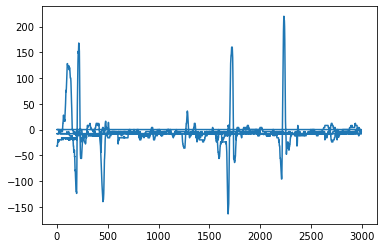

In [9]:
plt.plot(data["canSteering"])
plt.show()

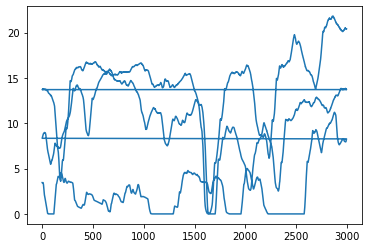

In [10]:
plt.plot(data["canSpeed"])
plt.show()

In [11]:
# Converting path of images into lists
speed_images = speed_data["cameraRight"].tolist()
curved_images = curve_data["cameraRight"].tolist()
rem_speed_images = rem_speed_data["cameraRight"].tolist()
rem_curve_images = rem_curve_data["cameraRight"].tolist()


### Function to move images using path from dataframe

In [13]:
# Function to copy images using path in excel into training folder
def copy_train_img(destination, path):
    for img in path:
        try:
            shutil.move(img, destination + img.split("/")[-1])
        except:
            pass

### Moving Speed

In [14]:
# Using the copy_train_image function to copy speed images into train folder
destination = 'speed_images/speed/'  
path = speed_images
copy_train_img(destination, path)

### Moving Curved

In [15]:
# Using the copy_train_image function to copy curve images into train folder
destination = 'curve_images/curve/'  
path = curved_images
copy_train_img(destination, path)

### Moving Remainder Data

In [16]:
# Using the copy_train_image function to copy remainder images into train folder
destination1 = 'speed_images/remainder/'  
destination2 = 'curve_images/remainder/'
path1 = rem_speed_images #path of images which do not belong to the speed images
path2 = rem_curve_images #path of images which do not belong to the curve images
copy_train_img(destination1, path1)
copy_train_img(destination2, path2)
